In [1]:
%%capture
!pip3 install twitter-scraper-selenium
!pip install pandas
#!pip install https://github.com/fastai/fastai1/archive/master.zip
!pip install https://github.com/fastai/fastai.git
!pip install -U spacy==2.2.4
!npm uninstall protractor && npm install protractor

from twitter_scraper_selenium import scrape_profile
from twitter_scraper_selenium import scrape_profile_with_api #don't technically need this 
from fastai.text import *
import pandas as pd
#from fastai.learner import load_learner
#import fastai.text

# installing and importing libraries needed

In [ ]:
#ollie = scrape_profile(twitter_username="kureijiollie",output_format="csv",browser="chrome",tweets_count=1000)
#the initial thing but kinda slow even for 10

In [3]:
vchuba = scrape_profile(twitter_username="gawrgura",output_format="csv",browser="chrome",tweets_count=1000)
#for different vtuber who is not id, en, and jp

[WDM] - Current google-chrome version is 114.0.5735
[WDM] - Get LATEST driver version for 114.0.5735
[WDM] - Driver [/Users/jjeong/.wdm/drivers/chromedriver/mac64/114.0.5735.90/chromedriver] found in cache


In [ ]:
scrape_profile_with_api('kureijiollie', output_filename='ollie.csv',output_dir="Users/jjeong/tem_tweets", tweets_count=10, browser="chrome")
#doesn't work but apparently should be faster

In [ ]:
data = pd.read_csv("../tem_tweets/kureijiollie.csv",  encoding='utf-8')
data.head()

In [ ]:
data[data["content"].isnull()]

In [ ]:
sum(data["content"].isnull()) 

In [ ]:
sum(data["is_retweet"] == True)

In [ ]:
filtered_data = data[~(data["content"].isnull() | (data["is_retweet"] == True))]
filtered_data["content"] = filtered_data["content"].str.replace(r"https?://\S+", "", regex=True)


In [ ]:
data = (TextList.from_df(filtered_data, cols='content')
                .split_by_rand_pct(0.1)
               .label_for_lm()  
                .databunch(bs=48))

data.show_batch()

In [ ]:
# Create deep learning model
learn = language_model_learner(data, AWD_LSTM, drop_mult=0.3, model_dir = '/tmp/work')

# select the appropriate learning rate
learn.lr_find()

# we typically find the point where the slope is steepest
learn.recorder.plot(skip_end=15)

# Fit the model based on selected learning rate
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))



In [ ]:
# Predict Tweets starting from the given words 
N_WORDS = 100

print(learn.predict("", N_WORDS, temperature=0.75))

In [ ]:
filtered_data.head(5)

In [4]:
#lets try again 
data = pd.read_csv("../tem_tweets/gawrgura.csv",  encoding='utf-8')
data.head()

,tweet_id,username,name,profile_picture,replies,retweets,likes,is_retweet,retweet_link,posted_time,content,hashtags,mentions,images,videos,tweet_url,link
0,1637461988358995970,gawrgura,Gawr Gura,https://pbs.twimg.com/profile_images/153970167...,577,6874,49018,False,NaN,2023-03-19T14:32:15+00:00,I LOVE HOLOLIVE \nu make little fishe big drea...,['ひろがるホロライブDAY2'],[],['https://pbs.twimg.com/media/Frlu_5bWAAE_1Z4?...,[],https://twitter.com/gawrgura/status/1637461988...,NaN
1,1662521026507317255,gawrgura,Gawr Gura,https://pbs.twimg.com/profile_images/153970167...,285,1588,15351,False,NaN,2023-05-27T18:07:55+00:00,bully the npc\nA+ only runs \n\nwith \n@morica...,[],"['moricalliope', 'ourokronii', 'ceresfauna']",['https://pbs.twimg.com/media/FxJ1rLyXgAI1r3E?...,[],https://twitter.com/gawrgura/status/1662521026...,NaN
2,1662335412348817409,akirosenthal,アキ・ローゼンタール6/1(木)21時3Dライブ！Aki Rosenthal ホロライブ1期生,https://pbs.twimg.com/profile_images/166417118...,133,4149,15631,True,https://twitter.com/akirosenthal/status/166233...,2023-05-27T05:50:21+00:00,** ┈┈┈┈┈┈** \n本日２１時 開演\n** ┈┈┈┈┈┈**\n\n⋱ついにこの...,['アキロゼ生誕祭2023'],[],['https://pbs.twimg.com/media/FxHLfOtaUAEdgQt?...,[],https://twitter.com/akirosenthal/status/166233...,NaN
3,1659232785494679553,gawrgura,Gawr Gura,https://pbs.twimg.com/profile_images/153970167...,158,862,10759,False,NaN,2023-05-18T16:21:37+00:00,i am so excited for this AAAAAAA,[],[],['https://pbs.twimg.com/media/FwaYpHrWwAA965Q?...,[],https://twitter.com/gawrgura/status/1659232785...,NaN
4,1657395291291627522,gawrgura,Gawr Gura,https://pbs.twimg.com/profile_images/153970167...,118,702,7362,False,NaN,2023-05-13T14:40:05+00:00,"pikuniku , with kiwawa ! \nin a bit !",[],[],['https://pbs.twimg.com/media/FwAJsHdWAAEA93T?...,[],https://twitter.com/gawrgura/status/1657395291...,NaN


In [5]:
filtered_data = data[~(data["content"].isnull() | (data["is_retweet"] == True))]
filtered_data["content"] = filtered_data["content"].str.replace(r"https?://\S+", "", regex=True)
#filtered_data = data[~(data["is_retweet"] | data["link"].str.contains('\w', na=False))]

<ipython-input-5-e4b26594d740>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["content"] = filtered_data["content"].str.replace(r"https?://\S+", "", regex=True)


In [6]:
data = (TextList.from_df(filtered_data, cols='content')
                .split_by_rand_pct(0.1)
               .label_for_lm()  
                .databunch(bs=48))

data.show_batch()

idx,text
0,xxunk \n xxup 8pm xxup est today ! xxbos big xxunk xxunk xxunk xxbos when you if you and i but when if you i xxunk when you if xxbos xxup xxunk xxup everything xxup you xxup xxunk — xxbos xxunk xxunk ... xxunk xxbos xxup this \n xxup is \n xxup minecraft xxbos xxunk xxunk soon xxbos a xxunk xxunk game ! oh xxunk ! \n
1,"oh xxunk ! \n xxbos xxup the xxup xxunk xxup toot \n xxbos concert xxunk ! ! ! xxbos xxunk your xxunk xxunk ? \n xxbos xxunk xxunk xxunk is just the best xxbos i am the xxunk xxunk . \n my xxunk xxunk was xxunk xxunk xxunk for no xxunk on xxunk and my xxunk xxunk xxunk oh , xxunk xxunk . i just got"
2,"just got it back ( xxunk ) \n so in the xxunk i xxup xxunk xxup xxunk . i am now so xxunk it xxunk to move . \n \n no xxunk in minecraft xxbos startin s xxrep 7 o n xxbos minecraft tonite , xxunk \n xxbos shark in minecraft soon ! \n xxbos stream xxunk ! ! \n 8 xxunk est ! xxbos"
3,"minecraft soon after so xxunk ! ! \n xxbos what s this ? ! xxbos xxunk \n we xxunk this weekend , xxunk xxunk \n :3 xxbos xxup come xxup see xxup me xxup in xxup xxunk xxrep 5 ! \n xxunk first xxup xxunk concert is this summer ! \n aaa xxrep 8 a xxbos xxunk bigfish xxunk \n xxunk xxunk xxunk ,"
4,blue ! xxbos xxup im xxup so xxup xxunk xxup for xxup xxunk xxrep 6 a xxbos s xxrep 6 o n ! ! ! xxbos early xxunk xxunk xxunk xxunk \n i am xxunk xxbos xxmaj soon xxunk ! xxbos xxup its xxup time \n shark xxup 3d xxunk xxrep 4 ! \n xxunk . very special xxunk guests \n i m xxunk xxunk will


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time
0,5.069586,4.117644,0.230952,00:09


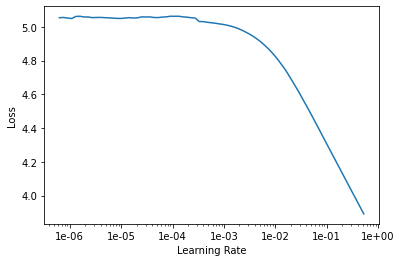

In [7]:
# Create deep learning model
learn = language_model_learner(data, AWD_LSTM, drop_mult=0.3, model_dir = '/tmp/work')

# select the appropriate learning rate
learn.lr_find()

# we typically find the point where the slope is steepest
learn.recorder.plot(skip_end=15)

# Fit the model based on selected learning rate
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))


In [8]:
# Predict Tweets starting from the given words 
N_WORDS = 100

print(learn.predict("", N_WORDS, temperature=0.75))

 
  
  The Big Blue Shark ( The Big Blue , The Big Big Fish ) ( The Big Fish ) ( The Big Fish ) is a Big Fish Big Fish Big Fish Fish Fish . It is a Big Fish Fish Fish Fish . It is a fish - in - fish - fish - fish - fish , little fish . It 's a
